In [1]:
import sqlite3
import pandas as pd
data = sqlite3.connect('disgenet_2018.db')
#Import All the data related to genes and diseases. 
key = pd.read_sql_query("SELECT * FROM disease2class", data)
diseases = pd.read_sql_query("SELECT * FROM diseaseAttributes", data)
diseaseClass = pd.read_sql_query("SELECT * FROM diseaseClass", data)
genediseaseNetwork = pd.read_sql_query("SELECT * FROM genediseaseNetwork", data)  
geneAttributes = pd.read_sql_query("SELECT * FROM geneAttributes", data)


In [2]:
gene_disease_connection = pd.DataFrame
gene_disease_connection = genediseaseNetwork
#gene_disease_connection = gene_disease_connection.drop(['association', 'associationType', 'sentence', 'pmid', 'EL', 'EI', 'year'], axis=1, inplace = True)
#gene_disease_connection = gene_disease_connection[gene_disease_connection['source'].str.contains('HPO', na = False)] 


In [3]:
#Initialise a list of all the genes involved with RTT and RTT-like conditions

#genes = pd.Series()
genes = ['MECP2', 'CDKL5', 'FOXG1', 'SMC1A', 'TBL1XR1', 'GABRD', 'SCN2A', 'SHANK3', 'SCN8A', 'IQSEC2', 'WDR45', 'ANKRD31',
         'CHRNA5', 'HCN1', 'SCN1A', 'TCF4', 'GRIN2B', 'SLC6A1', 'MGRN1', 'BTBD9', 'SEMA6B', 'AGAP6', 'MGRN1', 'VASH2', 'ZNF620',
         'GRAMD1A', 'GABBR2', 'ATP8B1', 'HAP1', 'PDLIM7', 'SRRM3', 'CACNA11', 'EEF1A2', 'STXBP1', 'ZNF238', 'SLC35A2',
         'ZFX', 'SHROOM4', 'EIF2B2', 'RHOBTB2', 'SMARCA1', 'EIF4G1', 'HTT', 'JMJD1C', 'SATB2', 'MEF2C', 'KCNQ2', 'SLC2A1', 'SYNGAP1',
        'PWP2', 'SCG2', 'IZUMO4', 'XAB2', 'ZSCAN12', 'FAM151A', 'SYNE2', 'ARHGEF10L', 'HDAC1', 'TAF1B', 'KCNJ10', 'CHD4',
         'LRRC40', 'LAMB2', 'IMPDH2', 'SAF2B', 'ACTL6B', 'TRRAP', 'SLC39A13', 'FAT3', 'IQGAP3', 'NCOR2', 'KCNA2']


genes = pd.Series(genes)
genes = pd.DataFrame(columns=['geneName'], data=genes)

In [4]:
#Extract genes associated to RTT from Gene Attributes and store their ID's, DPI and DSI
import numpy as np
gene_NID = geneAttributes['geneNID']
gene_names = geneAttributes['geneName']
DPI = geneAttributes['DPI']
DSI = geneAttributes['DSI']

geneAtt = pd.concat([gene_NID, gene_names, DPI, DSI], axis = 1)

RTTgenes = pd.DataFrame(columns=['geneNID', 'geneName', 'DPI', 'DSI'])

RTTgenes = pd.merge(geneAtt, genes, on= ['geneName'])

RTTgenes

,geneNID,geneName,DPI,DSI
0,811,CHD4,0.483,0.642
1,836,CHRNA5,0.414,0.598
2,1382,EEF1A2,0.69,0.51
3,1420,EIF4G1,0.586,0.63
4,1661,FOXG1,0.517,0.561
5,1787,GABRD,0.379,0.648
6,2037,GRIN2B,0.483,0.561
7,2169,HTT,0.517,0.579
8,2170,HDAC1,0.724,0.521
9,2548,IMPDH2,0.241,0.752


In [5]:
#Find all diseases that are related to each gene using genediseaseNetwork (GDN).
#GDN contains NID of genes and diseases, we want to pull out all of the diseases that match NIDS in RTTgenes
#Initialise all the geneNIDs with their gene names

geneNID = RTTgenes['geneNID']
geneNID = pd.Series(geneNID)
geneNID = pd.DataFrame(columns=['geneNID'], data=geneNID)

RTTgenes_diseases = pd.DataFrame
RTTgenes_diseases

#gene_disease_connection contains only the columns we need of GDN.
#NID, diseaseNID, geneNID, source, score
#This should dramatically reduce the amount of data we have
#Keep only the GDA's that are sourced from HPO.
RTTgenes_diseases = pd.merge(gene_disease_connection, geneNID, on= ['geneNID'])
#RTTgenes_diseases = RTTgenes_diseases[RTTgenes_diseases['source'].str.contains('HPO', na = False)] 
RTTgenes_diseases

,NID,diseaseNID,geneNID,source,association,associationType,sentence,pmid,score,EL,EI,year
0,194,2520,4594,HPO,\N,Biomarker,\N,\N,0.50,no reported evidence,1,NA
1,2155,8745,4594,GENOMICS_ENGLAND,\N,Biomarker,\N,\N,0.34,strong,1,NA
2,3114,1794,4594,HPO,\N,Biomarker,\N,\N,0.11,no reported evidence,1,NA
3,5646,1805,4594,GENOMICS_ENGLAND,\N,Biomarker,\N,\N,0.57,strong,1,NA
4,6313,1206,4594,HPO,\N,Biomarker,\N,\N,0.10,no reported evidence,\N,NA
5,7684,2621,4594,HPO,\N,Biomarker,\N,\N,0.10,no reported evidence,\N,NA
6,10171,12087,4594,HPO,\N,Biomarker,\N,\N,0.10,no reported evidence,\N,NA
7,11642,8877,4594,HPO,\N,Biomarker,\N,\N,0.13,no reported evidence,1,NA
8,12338,8900,4594,HPO,\N,Biomarker,\N,\N,0.10,no reported evidence,\N,NA
9,17387,1248,4594,HPO,\N,Biomarker,\N,\N,0.10,no reported evidence,\N,NA


In [6]:
#RTTgenes_diseases: df containing the key and score of GDA
#diseases: df containing name UMLS, disease name and type
#RTTgenes: df containing DPI, DSI and gene name and gene key
#We need to combine the names of diseases and genes, along with DPI, DSI and GDA score using their keys. 
RTT_GDA = pd.DataFrame
RTT_GDA = pd.merge(RTTgenes_diseases, diseases, on=['diseaseNID'])
RTT_GDA = pd.merge(RTT_GDA, RTTgenes, on=['geneNID'])
RTT_GDA = RTT_GDA.rename(index=str, columns={"diseaseId": "UMLS"})
RTT_GDA = RTT_GDA[RTT_GDA['type'].str.contains('disease', na = False)] 
RTT_GDA.drop_duplicates(subset = ['diseaseNID', 'geneNID', 'source', 'score', 'diseaseName', 'geneName'], keep = False, inplace = True)
RTT_GDA = RTT_GDA.drop(['NID', 'diseaseNID'], axis = 1)
RTT_GDA

,geneNID,source,association,associationType,sentence,pmid,score,EL,EI,year,UMLS,diseaseName,type,geneName,DPI,DSI
22,4594,GENOMICS_ENGLAND,\N,Biomarker,\N,\N,0.34,strong,1,NA,C0543888,Epileptic encephalopathy,disease,SLC2A1,0.69,0.441
27,4594,HPO,\N,Biomarker,\N,\N,0.11,no reported evidence,1,NA,C0025362,Mental Retardation,disease,SLC2A1,0.69,0.441
28,4594,BEFREE,1,Biomarker,GLUT1-DS is characterized by movement disorder...,21229316,0.11,no reported evidence,1,2011,C0025362,Mental Retardation,disease,SLC2A1,0.69,0.441
29,4594,GENOMICS_ENGLAND,\N,Biomarker,\N,\N,0.57,strong,1,NA,C0025958,Microcephaly,disease,SLC2A1,0.69,0.441
42,4594,HPO,\N,Biomarker,\N,\N,0.13,no reported evidence,1,NA,C0557874,Global developmental delay,disease,SLC2A1,0.69,0.441
60,4594,HPO,\N,Biomarker,\N,\N,0.10,no reported evidence,\N,NA,C0013362,Dysarthria,disease,SLC2A1,0.69,0.441
65,4594,HPO,\N,Biomarker,\N,\N,0.10,no reported evidence,\N,NA,C0013423,Dystonia Musculorum Deformans,disease,SLC2A1,0.69,0.441
70,4594,ORPHANET,\N,GermlineCausalMutation,\N,\N,0.80,no reported evidence,0.939394,NA,C1847501,Glut1 Deficiency Syndrome,disease,SLC2A1,0.69,0.441
113,4594,CLINVAR,\N,GeneticVariation,Standards and guidelines for the interpretatio...,25741868,0.80,no reported evidence,0.939394,2015,C1847501,Glut1 Deficiency Syndrome,disease,SLC2A1,0.69,0.441
122,4594,HPO,\N,Biomarker,\N,\N,0.11,no reported evidence,1,NA,C0002878,"Anemia, Hemolytic",disease,SLC2A1,0.69,0.441


In [7]:
#As we can see here, some of the genes were not added from the previous research conducted by Ehrhart et al, so we will no add these GDAs in. 

RTT_GDA[RTT_GDA['diseaseName'] == "Rett Syndrome"]
print(RTT_GDA.shape)

(2421, 16)


In [8]:
to_add = ['SMC1A', 'SCN2A', 'SHANK3', 'SCN8A', 'IQSEC2', 'WDR45', 'ANKRD31',
         'CHRNA5', 'HCN1', 'SCN1A', 'TCF4', 'GRIN2B', 'SLC6A1', 'MGRN1', 'BTBD9', 'SEMA6B', 'AGAP6', 'MGRN1', 'VASH2', 'ZNF620',
         'GRAMD1A', 'ATP8B1', 'HAP1', 'PDLIM7', 'SRRM3', 'CACNA11', 'EEF1A2', 'STXBP1', 'ZNF238', 'SLC35A2',
         'ZFX', 'SHROOM4', 'EIF2B2', 'RHOBTB2', 'SMARCA1', 'EIF4G1', 'HTT', 'SATB2', 'MEF2C', 'KCNQ2', 'SLC2A1', 'SYNGAP1',
        'PWP2', 'SCG2', 'IZUMO4', 'XAB2', 'ZSCAN12', 'FAM151A', 'SYNE2', 'ARHGEF10L', 'HDAC1', 'TAF1B', 'KCNJ10', 'CHD4',
         'LRRC40', 'LAMB2', 'IMPDH2', 'SAF2B', 'ACTL6B', 'TRRAP', 'SLC39A13', 'FAT3', 'IQGAP3', 'KCNA2']

#Append all of these values to the GDA dataframe for RTT (RTT_GDA) and add the following info:

geneAtt = geneAtt[geneAtt['geneName'].isin(to_add)]
geneAtt['source'] = 'Ehrhart'
geneAtt['score'] = 1.0
geneAtt['UMLS'] = 'C0035372'
geneAtt['diseaseName']  = 'Rett Syndrome'
geneAtt['type']  = 'disease'

print(RTT_GDA.shape)
RTT_GDA = RTT_GDA.append(geneAtt, sort = False)
print(RTT_GDA.shape)



(2421, 16)
(2473, 16)


In [9]:
RTT_GDA['interactionType'] = 'GDA'
RTT_GDA

,geneNID,source,association,associationType,sentence,pmid,score,EL,EI,year,UMLS,diseaseName,type,geneName,DPI,DSI,interactionType
22,4594,GENOMICS_ENGLAND,\N,Biomarker,\N,\N,0.34,strong,1,NA,C0543888,Epileptic encephalopathy,disease,SLC2A1,0.69,0.441,GDA
27,4594,HPO,\N,Biomarker,\N,\N,0.11,no reported evidence,1,NA,C0025362,Mental Retardation,disease,SLC2A1,0.69,0.441,GDA
28,4594,BEFREE,1,Biomarker,GLUT1-DS is characterized by movement disorder...,21229316,0.11,no reported evidence,1,2011,C0025362,Mental Retardation,disease,SLC2A1,0.69,0.441,GDA
29,4594,GENOMICS_ENGLAND,\N,Biomarker,\N,\N,0.57,strong,1,NA,C0025958,Microcephaly,disease,SLC2A1,0.69,0.441,GDA
42,4594,HPO,\N,Biomarker,\N,\N,0.13,no reported evidence,1,NA,C0557874,Global developmental delay,disease,SLC2A1,0.69,0.441,GDA
60,4594,HPO,\N,Biomarker,\N,\N,0.10,no reported evidence,\N,NA,C0013362,Dysarthria,disease,SLC2A1,0.69,0.441,GDA
65,4594,HPO,\N,Biomarker,\N,\N,0.10,no reported evidence,\N,NA,C0013423,Dystonia Musculorum Deformans,disease,SLC2A1,0.69,0.441,GDA
70,4594,ORPHANET,\N,GermlineCausalMutation,\N,\N,0.80,no reported evidence,0.939394,NA,C1847501,Glut1 Deficiency Syndrome,disease,SLC2A1,0.69,0.441,GDA
113,4594,CLINVAR,\N,GeneticVariation,Standards and guidelines for the interpretatio...,25741868,0.80,no reported evidence,0.939394,2015,C1847501,Glut1 Deficiency Syndrome,disease,SLC2A1,0.69,0.441,GDA
122,4594,HPO,\N,Biomarker,\N,\N,0.11,no reported evidence,1,NA,C0002878,"Anemia, Hemolytic",disease,SLC2A1,0.69,0.441,GDA


In [10]:
import glob
RTT_DGN_Pheno = pd.read_csv('/Users/ravinschmidl/Desktop/Thesis/Data/Phenotypes/RETT.csv')

path = r'/Users/ravinschmidl/Desktop/Thesis/Data/Phenotypes/Diseases' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

#We are adding all the files of diseases associated to RTT and RTT-like phenotypes
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

PDA = pd.concat(li, axis=0, ignore_index=True) #Phenotype-Disease Associations
PDA

#Get HPO ID by removing the beginning of the link. 
HPOID = PDA["phenotype"].str.split('http://purl.obolibrary.org/obo/', n = 1, expand = True)
HPOID[1] = HPOID[1].str.replace('_',':')
PDA['HPO_ID'] = HPOID[1]


#Get Disease ID
UMLS = PDA["disease"].str.split('http://linkedlifedata.com/resource/umls/id/', n = 1, expand = True)
PDA['UMLS'] = UMLS[1]

PDA = PDA.drop(columns=["source", "sourceTitle", 'phenotype', 'disease'])
PDA['interactionType'] = 'PDA'

#Get Disease Name



In [11]:
PDA.to_csv(r'/Users/ravinschmidl/Desktop/Thesis/Data/HPO/PDA.csv')
RTT_GDA.to_csv(r'/Users/ravinschmidl/Desktop/Thesis/Data/HPO/RTT_GDA.csv')

In [12]:
HPO_G2P = pd.read_csv('/Users/ravinschmidl/Desktop/Thesis/Data/HPO/HPO_G2P.csv')
HPO_G2P = HPO_G2P.rename(index=str, columns={"HPO ID": "HPO_ID"})
HPO_G2P['HPO_ID'] = HPO_G2P['HPO_ID'].str.replace('_',':')

#Colors = pd.DataFrame(columns=['code', 'color']) 
#Colors['code'] = RTT_GDA['geneName']
#Colors = Colors.drop_duplicates()
#Colors
HPO_G2P

,Unnamed: 0,Gene_ID,Gene_Symbol,Phenotype_Name,HPO_ID
0,0,8243,SMC1A,Multicystic kidney dysplasia,HP:0000003
1,1,8243,SMC1A,Intestinal malrotation,HP:0002566
2,2,8243,SMC1A,Cataract,HP:0000518
3,3,8243,SMC1A,Congenital diaphragmatic hernia,HP:0000776
4,4,8243,SMC1A,Hip dislocation,HP:0002827
5,5,8243,SMC1A,Dolichocephaly,HP:0000268
6,6,8243,SMC1A,Long eyelashes,HP:0000527
7,7,8243,SMC1A,Primary amenorrhea,HP:0000786
8,8,8243,SMC1A,Volvulus,HP:0002580
9,9,8243,SMC1A,Prenatal movement abnormality,HP:0001557


In [13]:
RTT_GDA = RTT_GDA.rename(index=str, columns={"geneName": "Gene_Symbol"})


In [14]:
#Colors for Cytoscape
GC = pd.DataFrame() 
GC1 = pd.DataFrame(data = RTT_GDA['Gene_Symbol'])
GC2 = pd.DataFrame(data =HPO_G2P['Gene_Symbol'])
GC = GC.append(GC1.append(GC2))
GC = GC.drop_duplicates()
GC = GC.rename(index=str, columns={"Gene_Symbol": "code"})
GC['color'] = 1

PC = pd.DataFrame()
PC1 = pd.DataFrame(data = HPO_G2P['HPO_ID'])
PC2 = pd.DataFrame(data = PDA['HPO_ID'])
PC = PC.append(PC1.append(PC2))
PC = PC.drop_duplicates()
PC = PC.rename(index=str, columns={"HPO_ID": "code"})
PC['color'] = 2


DC = pd.DataFrame()
DC1 = pd.DataFrame(data = RTT_GDA['UMLS'])
DC2 = pd.DataFrame(data = PDA['UMLS'])
DC = DC.append(DC1.append(DC2))
DC = DC.drop_duplicates()
DC = DC.drop_duplicates()
DC = DC.rename(index=str, columns={"UMLS": "code"})
DC['color'] = 3

Colors = GC.append(PC.append(DC))
#print(Colors.shape)
Colors.to_csv(r'/Users/ravinschmidl/Desktop/Thesis/Data/HPO/Colors_wit_G2P.csv')
Colors[Colors['code']=='C0013384']

,code,color
759,C0013384,3


In [87]:
#Create an adjacency matrix for Phenotype to Disease. 
#If the column has more >1 1's, the resnik similarity must be measured between those phenotypes to that disease.
#We must Information content of HPO term, and MCA.
name = PDA['HPO_ID'].drop_duplicates()
PA = pd.crosstab(PDA['HPO_ID'], PDA.UMLS)
PA.shape

(55, 3036)

In [88]:

diseaseName = PDA.diseaseName
diseaseName = diseaseName.drop_duplicates()

PA   

UMLS,C0000744,C0001080,C0001193,C0001206,C0001403,C0001622,C0002066,C0002395,C0002875,C0002880,...,C4225669,C4225671,C4273897,C4274078,C4274080,C4274081,C4274085,C4274118,C4274761,C4275075
HPO_ID,,,,,,,,,,,,,,,,,,,,,
HP:0000164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HP:0000252,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,1,0,0,1,0
HP:0000400,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HP:0000716,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HP:0000717,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
HP:0000726,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
HP:0000729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HP:0000733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HP:0001063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#Identify phenotypes that need to be clusters
#Create Similarity matrix of phenotypes based on each disease(column)

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl



#Initialise a new Similarity Matrix where all the phenotypes will be added into.
A = np.zeros([len(PA), len(PA)])
A = pd.DataFrame(A,index=A[:,0])


i=1
j=1
#Initialise the dataframe to calculate MCA, Resnik and Lin Similarity
B = pd.DataFrame()
b1 = []
b2 = []

#Construct a for loop to iterate through Adjacency Matrix of PDA
for i in range(0, len(PA)):
    for j in range(0, len(PA.columns)):
        if PA.iloc[i-1,j] == 1: #If there is a PDA
            if int(PA.iloc[i-1,j]) == int(PA.iloc[i,j]): #If the Phenotype above has the sa
                #print("Term 1:")
                #print(PA.iloc[[i],j])
                #term_1 = str(PA.iloc[[i],j])
                x = str(PA.iloc[[i-1],j]) 
                b1.append(x)
                B1 = pd.Series(b1)
                #print("Term 2: ")
                #print(PA.iloc[[i+1], j])
                #print(term1)
                y = str(PA.iloc[[i], j])
                b2.append(y)
                B2 = pd.Series(b2)
                
                #term_2 = str(PA.iloc[[i+1], j])
                #Store Term 1 in column 1 and term 2 in column 2
                #B['term_1'] = B.append[B1] 
                #B['term_1', 'term_2'] = [term_1, term_2]
                #print(term1)
                #Calculate similarity
                #print("---------")

#What we have now in B1 and B2 are the two phenotypes that need to be compared. 
#The phenotypes were stored with their diseases, and both B1 and B2 are labeled with the disease
#We can use the disease as an ID for the two phenotype terms to be compared 
#These are then stored into a new dataframe.
#Subsequently, all of the MCA's of each pair must be determined and input into the DataFrame as new column..
#Using the MCA, the Resnik measure and Lin Measure can thus be deduced and these are also input into the dataframe. 
#Finally, for each disease, a similarity matrix (should be symmetric) of phenotypes will be constructed and.. 
#both similarity measures will be input into the matrix. 
#Hierarchical clustering will be conducted on the phenotypes


#Split text into different columns in B1
B_1 = B1.str.split(pat = '\n', expand = True)
B_1 = B_1.drop([0], axis = 1)
#Removing Unwanted text from data
HPOID_1 = B_1[1].str.replace(' 1','')
UMLS_1 = B_1[2].str.replace('Name: ','')
UMLS_1 = UMLS_1.str.replace(', dtype: int64','')
#Storing Term 1 UMLS and HPOID
B1 = pd.DataFrame(columns = ['UMLS', 'HPO_ID'])
B1['UMLS'] = UMLS_1
B1['HPO_ID'] = HPOID_1

#Split text into different columns in B2
B_2 = B2.str.split(pat = '\n', expand = True)
B_2 = B_2.drop([0], axis = 1)
#Removing Unwanted text from data
HPOID_2 = B_1[1].str.replace(' 1','')
UMLS_2 = B_1[2].str.replace('Name: ','')
UMLS_2 = UMLS_2.str.replace(', dtype: int64','')
#Storing Term 2 UMLS and HPOID
B2 = pd.DataFrame(columns = ['UMLS', 'HPO_ID'])
B2['UMLS'] = UMLS_2
B2['HPO_ID'] = HPOID_2

#Creating Term Comparison DataFrame
#This will be the skeleton for the similarity matrix
#Similarity matrix is constructed for all rows that have the same UMLS 
#where rows and columns are the unique HPOID's and the values in them are the similarity..
#measures calculated
B = pd.merge(B1, B2, on= ['UMLS'])
B = B.rename(index=str, columns={'HPO_ID_x': 'Term_1', 'HPO_ID_y': 'Term_2'})
B['Key'] = np.arange(len(B))
print(B)


           UMLS         Term_1         Term_2    Key
0      C0035372  HP:0100716     HP:0100716         0
1      C0035372  HP:0100716     HP:0000164         1
2      C0035372  HP:0100716     HP:0000252         2
3      C0035372  HP:0100716     HP:0000400         3
4      C0035372  HP:0100716     HP:0000716         4
5      C0035372  HP:0100716     HP:0000717         5
6      C0035372  HP:0100716     HP:0000726         6
7      C0035372  HP:0100716     HP:0000729         7
8      C0035372  HP:0100716     HP:0000733         8
9      C0035372  HP:0100716     HP:0001063         9
10     C0035372  HP:0100716     HP:0001163        10
11     C0035372  HP:0100716     HP:0001250        11
12     C0035372  HP:0100716     HP:0001251        12
13     C0035372  HP:0100716     HP:0001257        13
14     C0035372  HP:0100716     HP:0001324        14
15     C0035372  HP:0100716     HP:0001332        15
16     C0035372  HP:0100716     HP:0001387        16
17     C0035372  HP:0100716     HP:0001423    

In [18]:
#Find MCA
import networkx as nx
import obonet as obo
from hpo_similarity import open_ontology

url = 'http://purl.obolibrary.org/obo/hp.obo'
graph = obo.read_obo(url)

In [19]:
Term_1 = pd.DataFrame(B['Term_1'])
Term_1['Key'] = np.arange(len(Term_1))
Term_2 = pd.DataFrame(B['Term_2'])
Term_2['Key'] = np.arange(len(Term_2))
i=0



In [20]:
#Get ID's for each term

Term1 = pd.Series(B['Term_1'])
Term1 = Term1.str.replace('   ','')
Term1 = Term1.tolist()
Term2 = pd.Series(B['Term_2'])
Term2 = Term2.str.replace('   ','')
Term2 = Term2.tolist()


#Determine types of variables to compare, they should be the same.
name_to_id = {data['name']: id_ for id_, data in graph.nodes(data=True) if 'name' in data}
print('Type of HPOID in Series')
print(type(Term1[1]))
print('Type of HPOID in HPO')
print(type(name_to_id['Self-injurious behavior']))

Type of HPOID in Series
<class 'str'>
Type of HPOID in HPO
<class 'str'>


In [21]:
#Get Descendents for each 
#nx.descendants returns a set
# we can use set(x) & set(y) to get the common values

MCA = []

def get_common_ancestors(Term1, Term2):
    for i in range (0, len(Term1)):
        #Terms to be compared
        T1 = Term1[i]
        T2 = Term2[i]
        
        #MCA Term1
        x = nx.descendants(graph, T1)
        y = nx.descendants(graph, T2)
        
        #Append all of the intersections in each set of ancestors
        z = set(x) & set (y)
        MCA.append(z)
        
        
    
    return MCA
return None



In [22]:
#print(type(nx.descendants(graph, 'HP:0002020')))
#print(nx.descendants(graph, 'HP:0002020'))
#print(list(nx.descendants(graph, 'HP:0002020')))
#nx.descendants(graph, 'HP:0002020')
#convert(nx.descendants(graph, 'HP:0100716'))
#print(List.iloc[1,1])
#print(List.iloc[1,0])
#Term1.iloc[0,]
"""mca = []
def get_list_ancestors(Term):
    for i in range (0, len(Term)):
        #Terms to be compared
        T = Term[i]
        #print(T1, T2)
        
        #MCA Term1
        x = nx.descendants(graph, T)
        mca.append(x)
        MCA = pd.Series(mca)
        
    return MCA
return None"""

'mca = []\ndef get_list_ancestors(Term):\n    for i in range (0, len(Term)):\n        #Terms to be compared\n        T = Term[i]\n        #print(T1, T2)\n        \n        #MCA Term1\n        x = nx.descendants(graph, T)\n        mca.append(x)\n        MCA = pd.Series(mca)\n        \n    return MCA\nreturn None'

In [23]:
#Checking what the list looks like
#Each row represents the intersection of Ancestors found both in Term1 and Term2
List1 = get_common_ancestors(Term1, Term2)
len(List1)

14077

In [24]:
#Since we want the most common ancestor we want to keep the last value in each set of each row
#So we store the ancestors in order in a list and append the last value of this list to a new list 
#Which is MCAS
sorted(List1[7])
MCAS = []
for i in range(len(List1)):
    List = sorted(List1[i])
    MCAS.append(List[-1])
    

In [25]:
MCAS

['HP:0100851',
 'HP:0000118',
 'HP:0000707',
 'HP:0000118',
 'HP:0012638',
 'HP:0012638',
 'HP:0012638',
 'HP:0012638',
 'HP:0012638',
 'HP:0000118',
 'HP:0000118',
 'HP:0012638',
 'HP:0012638',
 'HP:0012638',
 'HP:0000118',
 'HP:0012638',
 'HP:0000118',
 'HP:0000001',
 'HP:0000118',
 'HP:0000118',
 'HP:0000118',
 'HP:0000118',
 'HP:0000118',
 'HP:0012638',
 'HP:0012638',
 'HP:0000118',
 'HP:0000707',
 'HP:0012638',
 'HP:0012638',
 'HP:0000118',
 'HP:0000707',
 'HP:0012638',
 'HP:0012638',
 'HP:0012638',
 'HP:0012638',
 'HP:0012638',
 'HP:0000118',
 'HP:0000118',
 'HP:0000118',
 'HP:0000118',
 'HP:0000118',
 'HP:0012638',
 'HP:0000118',
 'HP:0000118',
 'HP:0000118',
 'HP:0012638',
 'HP:0000118',
 'HP:0000118',
 'HP:0000118',
 'HP:0000707',
 'HP:0000118',
 'HP:0012638',
 'HP:0012638',
 'HP:0000118',
 'HP:0000118',
 'HP:0000118',
 'HP:0031816',
 'HP:0000234',
 'HP:0000118',
 'HP:0000118',
 'HP:0000118',
 'HP:0000118',
 'HP:0000118',
 'HP:0000118',
 'HP:0000118',
 'HP:0000118',
 'HP:00001

In [34]:
print('Len Term1: ',len(Term1))
print('----------------------')
print('Len Term2: ',len(Term2))
print('----------------------')
print('Len List1: ',len(List1))
print('----------------------')

#print('Len List2: ',len(List2))


Len Term1:  14077
----------------------
Len Term2:  14077
----------------------
Len List1:  14077
----------------------


In [27]:
"""Ancestors1 = List1[0]
Ancestors2 = List1[1]
print(len(Ancestors1))
print(len(Ancestors2))
#print(Ancestors2[14077])
#B.iloc[14076, 'Key']"""

"Ancestors1 = List1[0]\nAncestors2 = List1[1]\nprint(len(Ancestors1))\nprint(len(Ancestors2))\n#print(Ancestors2[14077])\n#B.iloc[14076, 'Key']"

In [28]:
"""Ancestors = []

for i in range(0, len(Ancestors1)):
        List1 = list(Ancestors1[i])
        List2 = list(Ancestors2[i])
        #print(len(List1))
        #print(len(List2))
        for i in List1:
                if i in List2:
                    #while i != 'HP:0000001':
                    Ancestors.append(i)
                    
                break
"""

"Ancestors = []\n\nfor i in range(0, len(Ancestors1)):\n        List1 = list(Ancestors1[i])\n        List2 = list(Ancestors2[i])\n        #print(len(List1))\n        #print(len(List2))\n        for i in List1:\n                if i in List2:\n                    #while i != 'HP:0000001':\n                    Ancestors.append(i)\n                    \n                break\n"

In [30]:
#Now we have all the ancestors and all of the pheontypes. As we can see below, our data is correct
# as we have double the amount of data for ancestors than phenotypes. What this means is that
# we can now construct the symmetric similarity matrices for each disease using the MCA's retrieved.
# We can then start to deduce the Resnik and Lin Similarity. 
"""a = len(Ancestors)
b = len(B)
c = a/b
print("Ancestors")
print(a)
print("# of pairs of phenotypes that sim needs to be calculated for")
print(b)
print("Difference between # of Ancestors and # of phenotype pairs")
print(c)"""


'a = len(Ancestors)\nb = len(B)\nc = a/b\nprint("Ancestors")\nprint(a)\nprint("# of pairs of phenotypes that sim needs to be calculated for")\nprint(b)\nprint("Difference between # of Ancestors and # of phenotype pairs")\nprint(c)'

In [33]:

def countX(i, j): 
    count = 0
    for i in MCAS: 
        if (i == j): 
            count = count + 1
    return count 
  
# Driver Code 

Unique_MCA = pd.Series(MCAS).drop_duplicates().tolist()
Unique_Ancestors = pd.DataFrame()

C = []
for j in Unique_MCA:
    C.append(countX(MCAS, j))

Unique_Ancestors['MCA'] = Unique_MCA
Unique_Ancestors['Count'] = C
Unique_Ancestors

,MCA,Count
0,HP:0100851,7
1,HP:0000118,8642
2,HP:0000707,796
3,HP:0012638,2801
4,HP:0000001,450
5,HP:0031816,35
6,HP:0000234,36
7,HP:0100547,117
8,HP:0011842,318
9,HP:0012639,28


In [ ]:
#Delete the root as an MCA as all phenotypes are connected to the root. 
##Unique_Ancestors

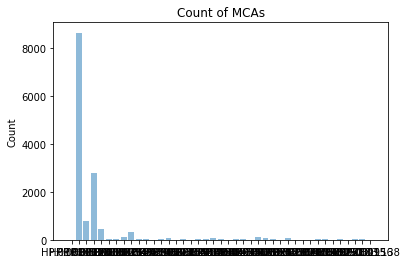

In [35]:
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

MCA = Unique_Ancestors['MCA']
y_pos = np.arange(len(MCA))
Count = Unique_Ancestors['Count']

plt.bar(y_pos, Count, align='center', alpha=0.5)
plt.xticks(y_pos, MCA)
plt.ylabel('Count')
plt.title('Count of MCAs')

plt.show()

In [75]:
print(len(MCAS))
print(PA.shape)
x = PA.values
print(x.shape)

#Loop through each column
a = []
for i in x.T:
    a.append(i)
        
len(a)

14077
(55, 3036)
(55, 3036)


3036

In [119]:
import numpy as np
import pandas as pd
import math
from sklearn.metrics import jaccard_similarity_score

x = PA.values
X = x.T
j = []
for i in X:
    a = X[i]
    b = X[i+1]
    j = jaccard_similarity_score(a, b, normalize = True)
    J = pd.Series(j)
    
J.to_csv(r'/Users/ravinschmidl/Desktop/what.csv')
    
    

#def calculate_eucl_distance(X):
    #i = 1
    #j = 1
    #for i in X:
       # eucl_dist = []
        #for j in X.T:
           # eucl_dist.append(
              #  math.sqrt(
               #     ((X[i,0] - X[j,0]) ** 2) +
                #    ((X[i,1] - X[j,1]) ** 2)))

        #eucl_dist.sort()

#    return eucl_dist

In [133]:
d = X[4]
f = X[5]
d
jaccard_similarity_score(d, f, normalize = True)

0.9272727272727272

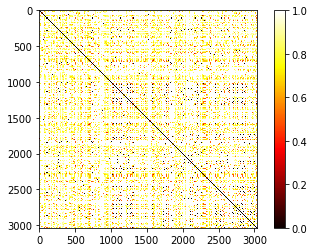

In [175]:
# We have the phenotype disease Matrix
# Construct 3036x3036 matrix
# Where each index of row and col is the index of the col in PA
#
#Create empty matrix to fill
from scipy.spatial.distance import pdist,squareform

x = squareform(pdist(PA.T, metric='jaccard'))
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(x, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

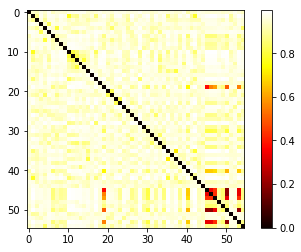

In [176]:
from scipy.spatial.distance import pdist,squareform

y = squareform(pdist(PA, metric='jaccard'))
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(y, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [163]:
import matplotlib.pyplot as plt
import numpy as np

# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

In [95]:
#X = StandardScaler().fit_transform(PA.values)
X = PA.values
eps_dist = calculate_eucl_distance(X)
plt.hist(eps_dist,bins=30)
plt.ylabel('n');
plt.xlabel('Epsilon distance');

TypeError: only size-1 arrays can be converted to Python scalars

In [40]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


#Convert the adjacency matrix of Phenotypes to Disease to an np array (Matrix)
Pa = PA.values
X, labels_true = make_blobs(n_samples=3036, centers=centers, cluster_std=0.4,
                            random_state=0)

#Scale the values in the matrix
X = StandardScaler().fit_transform(Pa)

#
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 0
Estimated number of noise points: 55


/Users/ravinschmidl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/Users/ravinschmidl/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)